In [1]:
## IMPORTS ##
import numpy as np
from pathlib import Path
import yt
import matplotlib.pyplot as plt
import sys
import pwlf
sys.path.append("../FLASH")

from fitting_functions import Ray 

yt : [INFO     ] 2025-07-22 22:28:19,209 Loading plugins from /home/dschneidinger/.config/yt/my_plugins.py
yt : [INFO     ] 2025-07-22 22:28:19,273 Parameters: current_time              = 1.8520020414484505e-09
yt : [INFO     ] 2025-07-22 22:28:19,273 Parameters: domain_dimensions         = [288 272 288]
yt : [INFO     ] 2025-07-22 22:28:19,273 Parameters: domain_left_edge          = [-0.6   -0.075 -0.6  ]
yt : [INFO     ] 2025-07-22 22:28:19,274 Parameters: domain_right_edge         = [0.6 1.  0.6]
yt : [INFO     ] 2025-07-22 22:28:19,274 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2025-07-22 22:28:20,262 xlim = -0.600000 0.600000
yt : [INFO     ] 2025-07-22 22:28:20,263 ylim = -0.075000 1.000000
yt : [INFO     ] 2025-07-22 22:28:20,264 xlim = -0.600000 0.600000
yt : [INFO     ] 2025-07-22 22:28:20,264 ylim = -0.075000 1.000000
yt : [INFO     ] 2025-07-22 22:28:20,265 Making a fixed resolution buffer of (('flash', 'magx')) 800 by 800



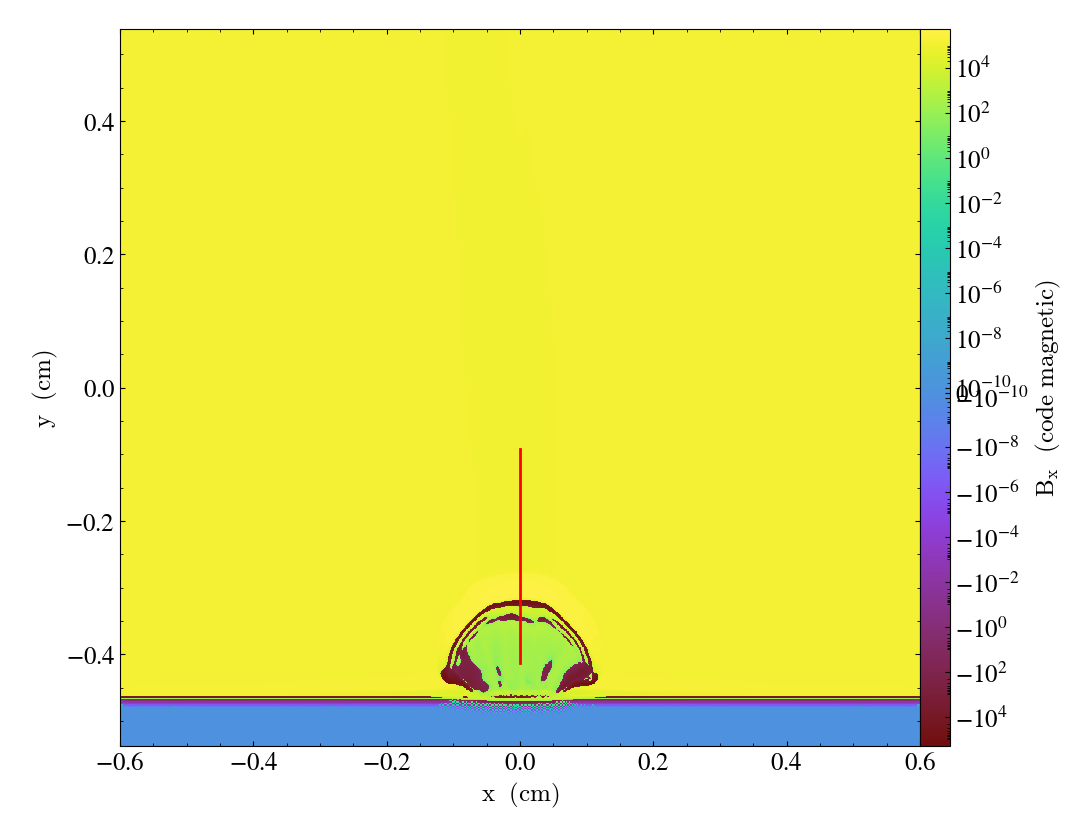

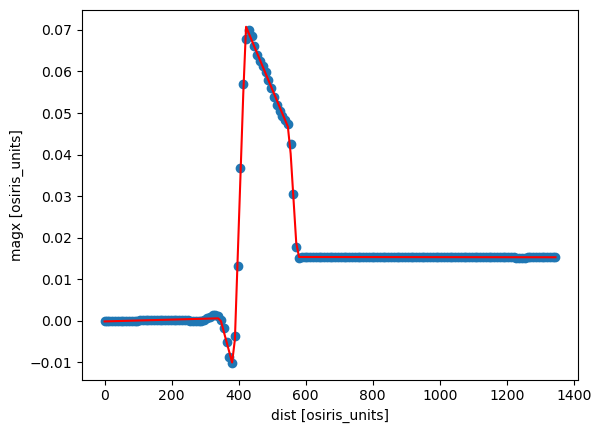

In [ ]:
## Path to FLASH data. This data was chosen because it's generally a simple setup.
## We want to characterize the fundamental behavior of a pison expanding out into a magnetized background. 
data_path = Path("/mnt/cellar/shared/simulations/FLASH_MagShockZ3D-Trantham_06-2024/MAGON/MagShockZ_hdf5_chk_0005")

# Use the plugin I built for yt to load in FLASH data and split up ion species.
yt.enable_plugins()

ds = yt.load_for_osiris(data_path, rqm_factor = 10)

start_point = (0,0.05,0)
end_point = (0,0.37,0)

lineout = Ray(ds, start_point, end_point)

lineout.show_ray("magx")

fit_result = lineout.fit("magx", degree=6, fit_func="piecewise", plot=True)

'if(x2 < 4.05662e+02, x2*(-7.88432e-16) + (3.80068e-13), if(x2 < 4.1056e+02, x2*(1.78604e+00) + (-7.2453e+02), if(x2 < 4.24053e+02, x2*(-3.48915e-01) + (1.51998e+02), if(x2 < 5.58975e+02, x2*(-1.38987e-03) + (4.62917e+00), if(x2 < 5.72867e+02, x2*(-1.75764e-01) + (1.021e+02), if(x2 < 7.14641e+02, x2*(-3.23889e-04) + (1.59613e+00), if(x2 < 9.15097e+02, x2*(1.1631e-03) + (5.33471e-01), if(x2 < 1.34491e+03, x2*(-2.89773e-04) + (1.86299e+00), 1.8629882508693227))))))))'

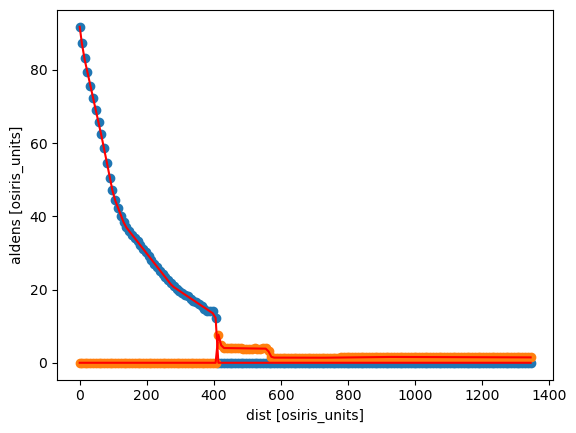

In [3]:
lineout.fit("sidens", degree=8, fit_func="piecewise", plot=True)
lineout.fit("aldens", degree=8, fit_func="piecewise", plot=True)
# lineout.show_lineout("aldens")

'"if(x2 < 34.34811, x2*4.70094e-05 + 2.53124e-03, if(x2 < 301.05261, x2*1.76969e-05 + 3.53807e-03, if(x2 < 386.92754, x2*1.45796e-05 + 4.47653e-03, if(x2 < 517.05531, x2*1.03944e-05 + 6.09592e-03, if(x2 < 523.17015, x2*-8.16195e-06 + 1.56906e-02, if(x2 < 630.75619, x2*-3.35616e-05 + 2.89789e-02, if(x2 < 727.41283, x2*-1.57581e-06 + 8.80367e-03, if(x2 < 741.95978, x2*-5.17287e-04 + 3.83939e-01, if(x2 < 783.74085, x2*-3.30258e-06 + 2.58284e-03, if(x2 < 1043.0827, x2*1.95493e-07 + -1.58740e-04, if(x2 < 1112.4822, x2*-8.27078e-08 + 1.31446e-04, if(x2 < 1121.14694, x2*-7.76181e-07 + 9.02923e-04, if(x2 < 1239.32033, x2*8.79945e-08 + -6.59454e-05, if(x2 < 1298.87652, x2*-6.4433e-07 + 8.41639e-04, if(x2 < 1513.22497, x2*4.61394e-08 + -5.51953e-05, -5.5195267263689894e-05))))))))))))))),"'

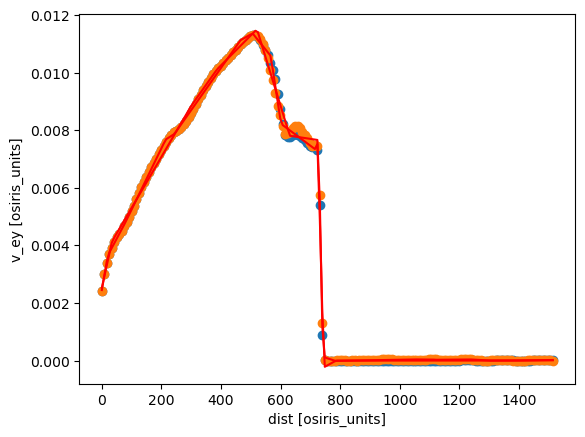

In [17]:
lineout.fit('v_iy', degree=15, fit_func="piecewise", plot=True)
lineout.fit('v_ey', degree=15, fit_func="piecewise", plot=True)

'"if(x2 < 556.62939, x2*3.14717e-06 + 5.69153e-02, if(x2 < 597.19272, x2*5.59577e-04 + -2.5281e-01, if(x2 < 728.71046, x2*1.60864e-04 + -1.47013e-02, if(x2 < 742.28223, x2*-4.29565e-03 + 3.23281e+00, if(x2 < 1513.22497, x2*1.37222e-06 + 4.32036e-02, 0.043203636493129874))))),"'

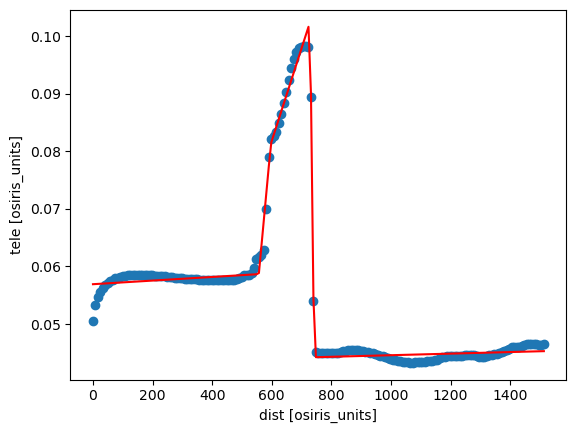

In [18]:
lineout.fit('tele', degree=5, fit_func="piecewise", plot=True)

'"if(x2 < 211.75144, x2*-5.22911e-07 + 2.38503e-03, if(x2 < 566.48909, x2*-1.94761e-06 + 2.68671e-03, if(x2 < 731.07848, x2*-8.53388e-08 + 1.63176e-03, if(x2 < 754.43487, x2*-3.29221e-05 + 2.5638e-02, if(x2 < 1513.22497, x2*3.45052e-08 + 7.74395e-04, 0.0007743946872226711))))),"'

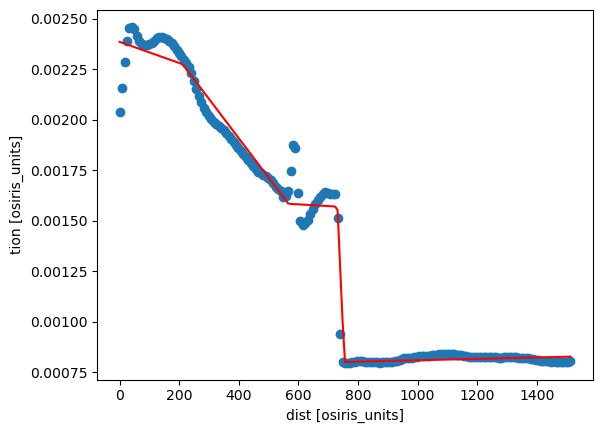

In [19]:
lineout.fit('tion', degree=5, fit_func="piecewise", plot=True)


'"if(x2 < 216.36985, x2*5.96337e-07 + 2.51426e-04, if(x2 < 324.48958, x2*-4.29398e-06 + 1.30954e-03, if(x2 < 557.7346, x2*1.52577e-06 + -5.78907e-04, if(x2 < 1170.95597, x2*1.55182e-08 + 2.63416e-04, if(x2 < 1637.95088, x2*1.84435e-07 + 6.56215e-05, 6.562154122482562e-05))))),"'

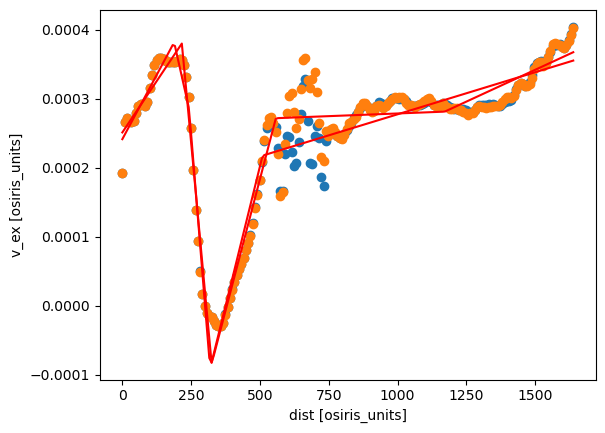

In [14]:
lineout.fit('v_ix', degree=5, fit_func="piecewise", plot=True)
lineout.fit('v_ex', degree=5, fit_func="piecewise", plot=True)

'"if(x2 < 267.96346, x2*-6.75940e-07 + 1.8274e-04, if(x2 < 631.18534, x2*3.01444e-07 + -7.91634e-05, if(x2 < 697.08707, x2*-5.61985e-06 + 3.65827e-03, if(x2 < 735.92698, x2*3.95295e-05 + -2.78148e-02, if(x2 < 756.12336, x2*-6.07770e-05 + 4.60035e-02, if(x2 < 849.58667, x2*-4.67689e-07 + 4.02224e-04, if(x2 < 1502.63356, x2*6.15148e-09 + -3.45088e-07, if(x2 < 1513.22497, x2*1.85778e-06 + -2.78267e-03, -0.0027826697167268495)))))))),"'

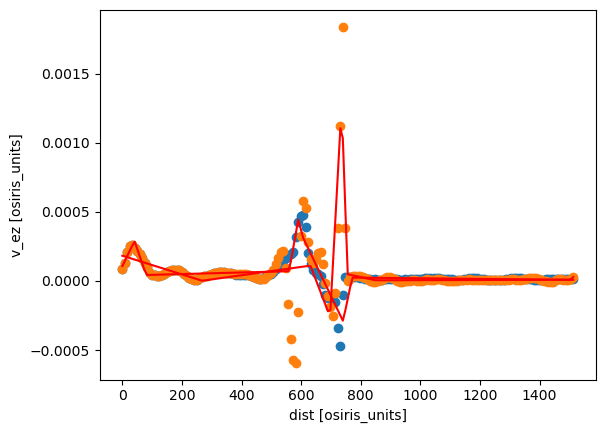

In [22]:
lineout.fit('v_iz', degree=8, fit_func="piecewise", plot=True)
lineout.fit('v_ez', degree=8, fit_func="piecewise", plot=True)

'"if(x2 < 239.61755, x2*-6.56331e-09 + 5.49750e-07, if(x2 < 430.71076, x2*2.99139e-08 + -8.19082e-06, if(x2 < 553.99558, x2*-2.08339e-07 + 9.44271e-05, if(x2 < 586.88461, x2*6.97002e-06 + -3.88235e-03, if(x2 < 751.36784, x2*-1.02215e-06 + 8.08132e-04, if(x2 < 766.17215, x2*-2.81560e-06 + 2.15567e-03, if(x2 < 986.06388, x2*9.30857e-09 + -8.69641e-06, if(x2 < 1097.13748, x2*-5.00473e-09 + 5.41742e-06, if(x2 < 1428.84814, x2*3.82641e-10 + -4.93261e-07, if(x2 < 1513.22497, x2*6.78526e-10 + -9.16037e-07, -9.160366552122466e-07)))))))))),"'

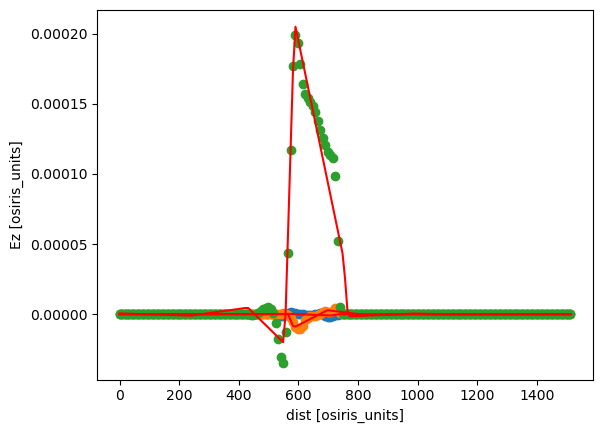

In [37]:
lineout.fit('Ex', degree=5, fit_func="piecewise", plot=True)
lineout.fit('Ey', degree=8, fit_func="piecewise", plot=True)
lineout.fit('Ez', degree=10, fit_func="piecewise", plot=True)

'"if(x2 < 235.85014, x2*-2.76837e-08 + -4.52598e-07, if(x2 < 534.30607, x2*-1.04369e-08 + -4.52025e-06, if(x2 < 539.04655, x2*4.09233e-05 + -2.18757e-02, if(x2 < 617.24278, x2*-6.62276e-06 + 3.75388e-03, if(x2 < 627.18298, x2*8.36761e-05 + -5.19824e-02, if(x2 < 666.37391, x2*-1.87561e-05 + 1.22613e-02, if(x2 < 685.68067, x2*2.12022e-05 + -1.43659e-02, if(x2 < 700.89699, x2*3.51897e-05 + -2.39569e-02, if(x2 < 738.45501, x2*-1.64881e-05 + 1.2264e-02, if(x2 < 1513.22497, x2*-2.86674e-07 + 2.99949e-04, 0.0002999494553622582)))))))))),"'

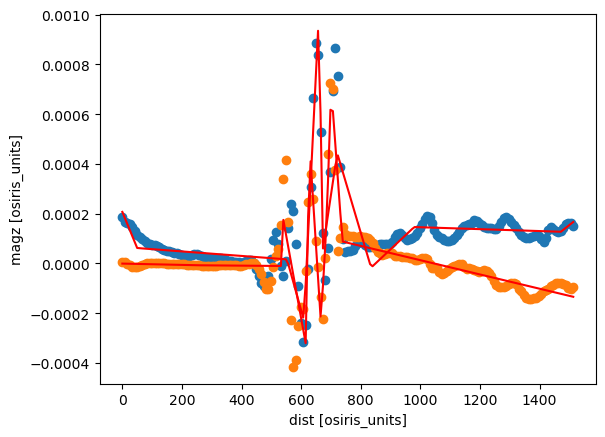

In [36]:
lineout.fit('magy', degree=10, fit_func="piecewise", plot=True)
lineout.fit('magz', degree=10, fit_func="piecewise", plot=True)